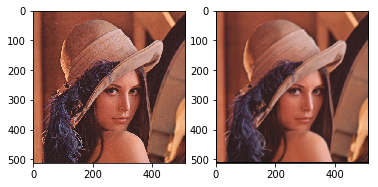

In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

def gauss_filter(img, windows_size,std):
    img2 = np.zeros_like(img)
    #kernel = np.ones((windows_size,windows_size))
    kernel = np.random.normal(0,std,(windows_size,windows_size))
    kernel = np.fabs(kernel)
    kernel/= kernel.sum()
    padding = windows_size//2
    for c in range(3):
        for i in range(padding, img.shape[0]-padding):
            for j in range(padding, img.shape[1]-padding):
                s = kernel*img[i-padding:i+padding+1, j-padding : j+padding+1,c]
                img2[i,j,c] = s.sum() 
    return img2

def gauss_separable_filter(img, windows_size,std):
    img2 = np.zeros_like(img)
    kernel = np.random.normal(0,std,windows_size)
    kernel = np.fabs(kernel)
    kernel/= kernel.sum()
    padding = windows_size //2
    for c in range(3):
        for i in range(padding, img.shape[0]-padding):
            for j in range(padding, img.shape[1]-padding):
                s = kernel*img[i, j-padding : j+padding+1,c]
                img2[i,j,c] = s.sum()
    img3 = np.zeros_like(img2)
    kernel = np.random.normal(0,std,(1,windows_size))
    kernel = np.fabs(kernel)
    kernel/= kernel.sum()
    for c in range(3):
        for i in range(padding, img.shape[0]-padding):
            for j in range(padding, img.shape[1]-padding):
                s = kernel*img2[i-padding : i+padding+1, j,c]
                img3[i,j,c] = s.sum()
    return img3
    
    
img = plt.imread('lenaRGB.png')[:,:,:3]
#img[::5,::5,:] = 1
img2 = gauss_filter(img, windows_size=5,std=5)

fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(img2)
plt.show()

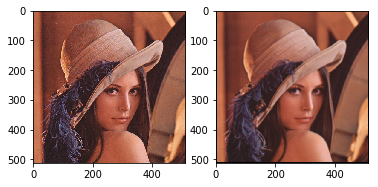

In [48]:
img3 = gauss_separable_filter(img, windows_size=5,std=3)
fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(img3)
plt.show()